# Filtering

## 1.2 Sharpening

In [26]:
import cv2, math
import skimage as skimg
import numpy as np
import matplotlib.pyplot as plt

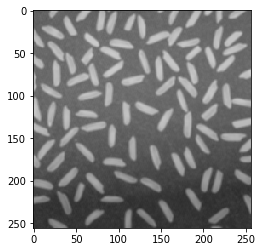

In [27]:
rice = cv2.imread('./rice.png')
plt.imshow(rice)

##### Sharpening

<p style="font-style:italic"> sharpened_image = original_image + details  </p>
<p style="font-style:italic"> details = original_image - blurred_image </p>

(Text(0.5, 1.0, 'Box Sharpen'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

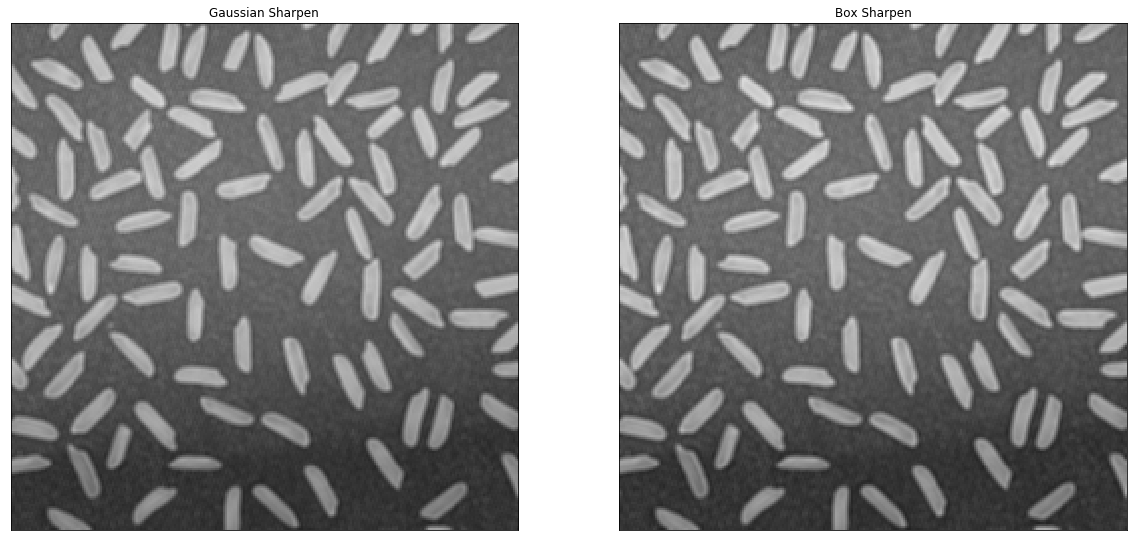

In [28]:
filter_size = 5
variance = 2

# Gaussian Filter
blurred_gaussian_rice = cv2.GaussianBlur(rice, (filter_size, filter_size), math.sqrt(variance))
gaussian_detail = rice - blurred_gaussian_rice
sharpened_gaussian_rice = rice + gaussian_detail

# Box Filter
box_filter = np.ones((filter_size, filter_size), np.float32)/(filter_size * filter_size)
blurred_box_rice = cv2.filter2D(rice, -1, box_filter)
box_detail = rice - blurred_box_rice
sharpened_box_rice = rice + box_detail

# plot
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sharpened_gaussian_rice)
plt.title("Gaussian Sharpen"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened_box_rice)
plt.title("Box Sharpen"), plt.xticks([]), plt.yticks([])

Gaussian filter acts as a low pass filter. This means that the details reflect the high frequencies, which are the edges. Therefore, adding the details onto the original images sharpens the images. The box filter, on the hand, averages the neighboring pixels. This smooths our the edges, which helps enhance the details as well. However, the effect should be less than that of the Gaussian filter. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Box Sharpen edge'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

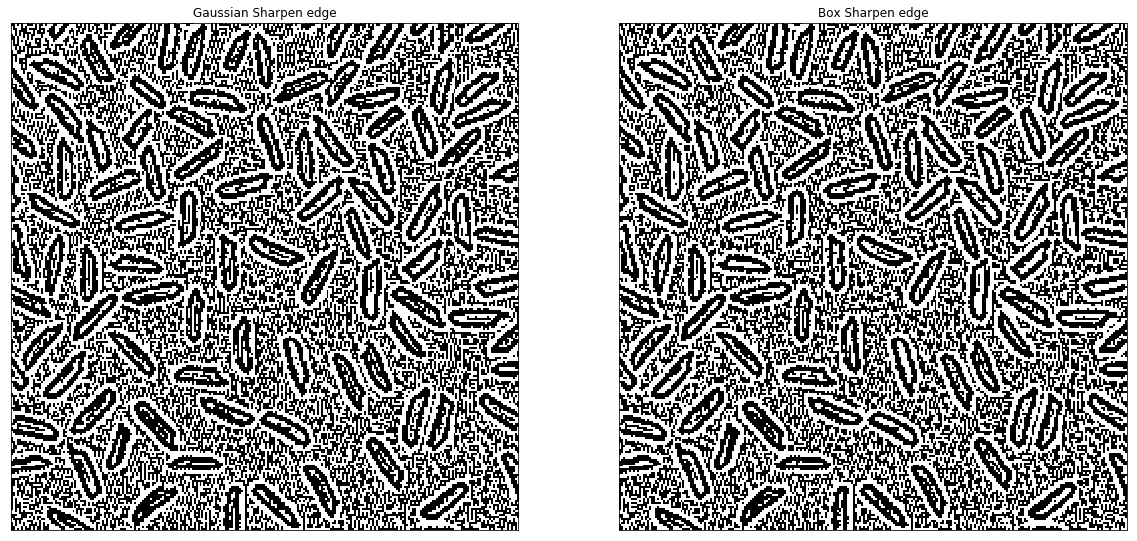

In [29]:
# detect the edges to compare sharpness of the two images 
gaussian_lap = cv2.Laplacian(sharpened_gaussian_rice, cv2.CV_64F, ksize=3)
box_lap = cv2.Laplacian(sharpened_box_rice, cv2.CV_64F, ksize=3)

# plot
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gaussian_lap)
plt.title("Gaussian Sharpen edge"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(box_lap)
plt.title("Box Sharpen edge"), plt.xticks([]), plt.yticks([])

From the two images above, it seems that the edges in the Gaussian filter are slightly more apparent. This confirms that the greater performance of the Gaussian filter. 